# Predicting Telecom Customer Churn

## Project Group #5 - Milestone 2

### Dataset Description 

Telecom companies collect enormous amount of customer details every day and whenever a customer subscribes to service. 

1. Data Acquisition and Initial Load

2. Initial Data Exploration

3. Data Missingness

4. Data Imbalance

5. Data Scaling

6. Preprocessing Summary


In [1]:
#Load Library
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn


# Load data into a DataFrame
file_path = "./data/cell2celltrain.csv"  # Replace with actual file path
train_churn_df = pd.read_csv(file_path)


## 2. Initial Data Exploration
- Data Overview: Summarise the dataset, listing the number of rows and columns, types of variables (quantitative vs. categorical), and a brief description of each feature.
- Statistical Summary: Generate basic statistics (mean, median, standard deviation, min, max) for numerical columns to identify any irregularities in data distribution.


In [2]:
# Display data shape
print("Train Data Size:")
print(train_churn_df.shape)

# Display sample data
print("\nSample Data:")
display(train_churn_df.head())

# Display basic information about the dataset
print("\nData Information:")
print(train_churn_df.info())

# Data Overview: List column names, types, and a sample value for each column
print("\nData Overview:")
for column in train_churn_df.columns:
    sample_value = train_churn_df[column].iloc[0]
    col_type = train_churn_df[column].dtype
    print(f"{column}: Type - {col_type}, Sample Value - {sample_value}")

# Separate quantitative and categorical variables
quantitative_columns = train_churn_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = train_churn_df.select_dtypes(include=['object']).columns

print("\nQuantitative Variables:", list(quantitative_columns))
print("Categorical Variables:", list(categorical_columns))

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(train_churn_df[quantitative_columns].describe())

# Additional statistics: calculating median for numerical columns
print("\nMedian for Numerical Columns:")
print(train_churn_df[quantitative_columns].median())



Train Data Size:
(51047, 58)

Sample Data:


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          

## 3. Data Missingness
- Missing Data Assessment:
    - Use methods like isnull().sum() to identify and quantify missing values in each feature.
    - Visualise missingness patterns, if any, using a library like missingno to understand the extent and distribution of missing values.



### Significance:
This plot helps quickly identify columns with missing data, which is useful for knowing the amount of missing values that each columns has. 

Columns with at least one nan value: 14
Rows  with at least one nan value: 1295

Missing Values Summary:
AgeHH1                   909
AgeHH2                   909
PercChangeMinutes        367
PercChangeRevenues       367
MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
ServiceArea               24
Handsets                   1
HandsetModels              1
CurrentEquipmentDays       1
dtype: int64


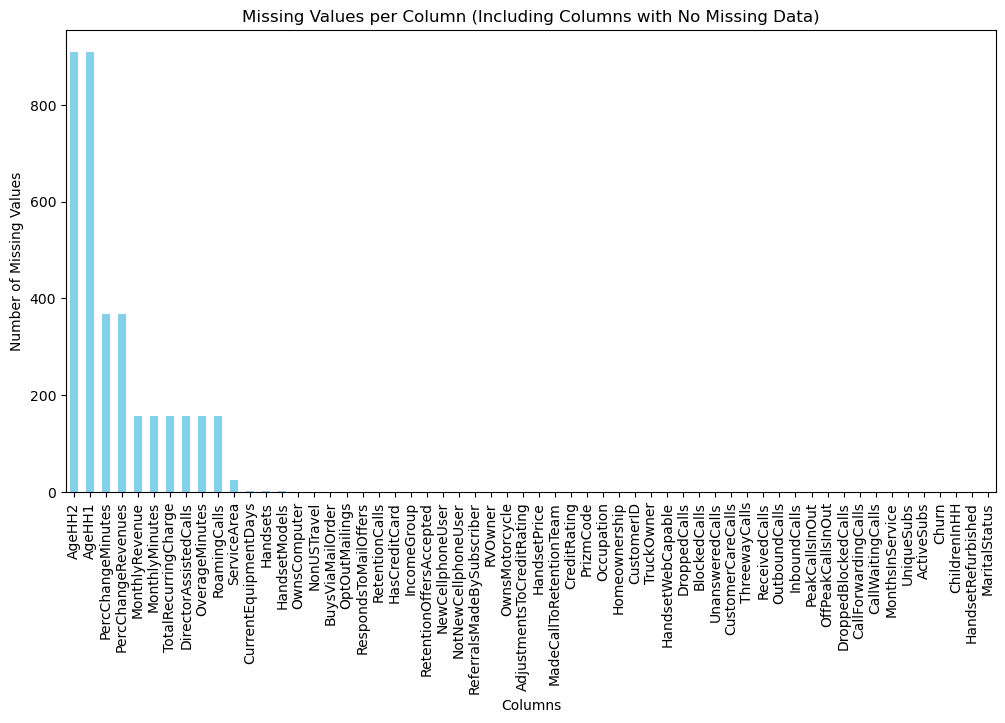

In [3]:
#Explore Missingness using missingno

print(f'Columns with at least one nan value: {train_churn_df.isna().any(axis=0).sum()}')
print(f'Rows  with at least one nan value: {train_churn_df.isna().any(axis=1).sum()}')

# Check for missing values
print("\nMissing Values Summary:")
missing_values = train_churn_df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))

# Plot missing values per column including those with zero missing values
plt.figure(figsize=(12, 6))
train_churn_df.isnull().sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Missing Values per Column (Including Columns with No Missing Data)")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()




## Data Imbalance
- Class Imbalance Check:
    Inspect the distribution of your target variable (churn vs. non-churn) to assess if an imbalance exists. Use a bar plot to visualise this distribution.


- Resampling Methods:
    Oversampling: Apply SMOTE or simple random oversampling to increase the instances of the minority class if an imbalance is found.
    Undersampling: Randomly undersample the majority class to create a balanced dataset, particularly if the majority class is large enough to allow data reduction without significant information loss.
    Documentation: Describe the imbalance handling technique chosen and provide a brief justification for its suitability in your context.



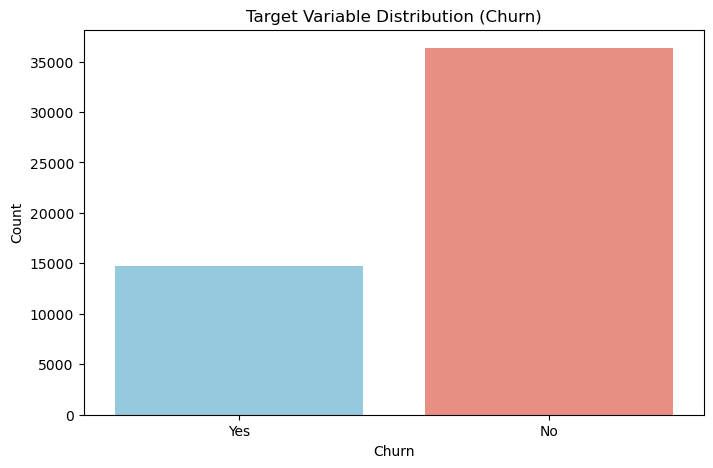

Class Distribution:
Churn
No     36336
Yes    14711
Name: count, dtype: int64

Imbalance Ratio: 0.40

Class distribution after oversampling:
Churn
Yes    0.5
No     0.5
Name: proportion, dtype: float64


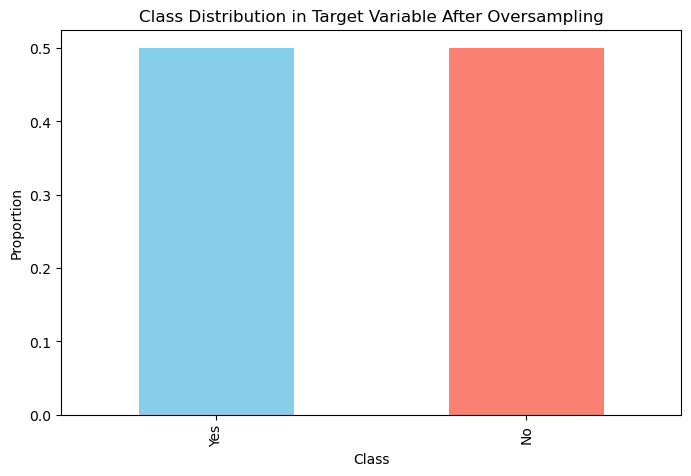

In [4]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the initial distribution of the target variable
if 'Churn' in train_churn_df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_churn_df, x='Churn', palette=['skyblue', 'salmon'])
    plt.title('Target Variable Distribution (Churn)')
    plt.ylabel('Count')
    plt.xlabel('Churn')
    plt.show()

    # Check the imbalance
    churn_counts = train_churn_df['Churn'].value_counts()
    print("Class Distribution:")
    print(churn_counts)

    # Calculate imbalance ratio
    imbalance_ratio = churn_counts.min() / churn_counts.max()
    print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")

# Define the target column and features
X = train_churn_df.drop(columns=['Churn'])  # Features (drop target column)
y = train_churn_df['Churn']                 # Target column

# Apply RandomOverSampler to balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new class distribution
print("\nClass distribution after oversampling:")
print(y_resampled.value_counts(normalize=True))

# Plot the new class distribution
plt.figure(figsize=(8, 5))
y_resampled.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.title("Class Distribution in Target Variable After Oversampling")
plt.show()



## 5. Data Scaling 

- Scaling Requirement Analysis:
    - Analyse the range and variance of quantitative features to determine if scaling is necessary. 

- Scaling Technique
    - Standardisation: Apply standardisation (StandardScaler in sklearn) if features follow a Gaussian distribution.
    - Normalisation: Use Min-Max normalisation (MinMaxScaler) if the data has outliers or varies widely in range.
    - Implementation: Apply scaling methods only to the quantitative variables and not to categorical features.





In [7]:
# Display summary statistics (range and standard deviation) for quantitative continuous features
# Assuming train_churn_df is your DataFrame

# Define your quantitative continuous features (update this list with actual column names if needed)
# quan_continuous_features = ['feature1', 'feature2', ...]
quan_cont_df = train_churn_df[quantitative_columns]

# Display the range and standard deviation of each feature
scaling_check = quan_cont_df.describe().T[['min', 'max', 'std']]
scaling_check['range'] = scaling_check['max'] - scaling_check['min']

print("Scaling Check for Quantitative Continuous Features:")
print(scaling_check)

# - If std is low and range is consistent, scaling might be less necessary.
# - Large ranges or high std indicate features that would benefit from scaling.


Scaling Check for Quantitative Continuous Features:
                                  min         max            std      range
CustomerID                 3000002.00  3399994.00  116905.561666  399992.00
MonthlyRevenue                  -6.17     1223.38      44.507336    1229.55
MonthlyMinutes                   0.00     7359.00     529.871063    7359.00
TotalRecurringCharge           -11.00      400.00      23.848871     411.00
DirectorAssistedCalls            0.00      159.39       2.228546     159.39
OverageMinutes                   0.00     4321.00      96.588076    4321.00
RoamingCalls                     0.00     1112.40       9.818294    1112.40
PercChangeMinutes            -3875.00     5192.00     257.514772    9067.00
PercChangeRevenues           -1107.70     2483.50      39.574915    3591.20
DroppedCalls                     0.00      221.70       9.043955     221.70
BlockedCalls                     0.00      384.30      10.946905     384.30
UnansweredCalls                  0.0

## Implementing Scaling

### Scaling Requirement Analysis
To determine the appropriate scaling technique for each quantitative continuous feature, we analyzed the **range** and **standard deviation** of these features:

- **Large Range Features**: Features with a high range are likely to contain values that vary widely, potentially with outliers.
- **Moderate Range Features with Gaussian-Like Distribution**: Features with moderate ranges and approximate Gaussian distributions are good candidates for standardisation.

The analysis led to the following scaling decisions:

1. **Min-Max Normalization** (for features with large ranges):
   - **Features**: `MonthlyMinutes`, `OverageMinutes`, `PercChangeMinutes`, `ReceivedCalls`, `PeakCallsInOut`, `OffPeakCallsInOut`
   - **Reason**: These features have high ranges and may contain outliers or widely varying values. Min-Max scaling will bring these features into a 0-1 range without distorting the effect of outliers.

2. **Standardisation** (for Gaussian-distributed features with moderate ranges):
   - **Features**: `MonthlyRevenue`, `TotalRecurringCharge`, `DirectorAssistedCalls`, `DroppedCalls`, `BlockedCalls`, `UnansweredCalls`, `CustomerCareCalls`
   - **Reason**: These features have moderate ranges, and if their distributions are approximately Gaussian, standardization will center them around zero with unit variance.

3. **Special Cases**:
   - **`CustomerID`**: Likely an identifier, so no scaling is applied.
   - **Discrete Numeric Features**: Features such as `RetentionOffersAccepted`, `ReferralsMadeBySubscriber`, `IncomeGroup`, and `AdjustmentsToCreditRating` might be categorical or represent counts. These can be treated as categorical if needed or normalised.

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the lists of features based on the scaling decision
features_to_normalize = [
    'MonthlyMinutes', 'OverageMinutes', 'PercChangeMinutes', 
    'ReceivedCalls', 'PeakCallsInOut', 'OffPeakCallsInOut'
]

features_to_standardize = [
    'MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 
    'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls'
]

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply Min-Max Normalization
train_churn_df[features_to_normalize] = min_max_scaler.fit_transform(train_churn_df[features_to_normalize])

# Apply Standardization
train_churn_df[features_to_standardize] = standard_scaler.fit_transform(train_churn_df[features_to_standardize])

# Verify the scaling by displaying a sample of the scaled features
print("\nSample of Scaled Data:")
print(train_churn_df[features_to_normalize + features_to_standardize].head())



Sample of Scaled Data:
   MonthlyMinutes  OverageMinutes  PercChangeMinutes  ReceivedCalls  \
0        0.029759             0.0           0.410058       0.036102   
1        0.001359             0.0           0.426933       0.000000   
2        0.001087             0.0           0.427153       0.000149   
3        0.178285             0.0           0.444690       0.074395   
4        0.000000             0.0           0.427374       0.000000   

   PeakCallsInOut  OffPeakCallsInOut  MonthlyRevenue  TotalRecurringCharge  \
0        0.027742           0.016274       -0.782676             -1.041153   
1        0.002392           0.000678       -0.940180             -1.250809   
2        0.000622           0.002509       -0.468118             -0.370255   
3        0.265796           0.205940        0.526784              1.181196   
4        0.000000           0.000000       -0.936810             -1.250809   

   DirectorAssistedCalls  DroppedCalls  BlockedCalls  UnansweredCalls  \
0      

### 6. Preprocessing Summary

- **Data Missingness**: Identified missing values and applied imputation (mean/median for continuous features, mode for categorical) to retain data completeness without introducing significant bias.

- **Data Imbalance**: Used Random Oversampling to balance the target classes, enhancing model performance on minority classes and reducing bias toward the majority.

- **Data Scaling**: Applied Min-Max Normalisation to features with large ranges and Standardisation to Gaussian-distributed features, ensuring consistency in feature scales for optimal model training.

**Impact on Modelling**: These preprocessing steps standardise the dataset, improve model accuracy, and make the data ready for effective visualisation and analysis.
